# Pima India Diabetes Data

The Pima ("River People", formerly known as Pima) are a group of Native Americans living in an area consisting of what is now central and southern Arizona.

This survey was done on females at least 21 years and above of Pima Indian heritage.

Lets understand the input paramters and target variable used in this dataset.

Ref : https://www.webmd.com/diabetes/guide/types-of-diabetes-mellitus

What is Diabetes:
Diabetes refers to the situation in which the blood sugar level increases. 

Type 1 Diabetes : Insulin is produced by pancreas and when it stops producing insulin or produces insufficient amount of insulin then it leads to lack of insulin in the body and it causes type 1 Diabetes

Type 2 Diabetes : With Type 2 diabetes, the pancreas usually produces some insulin. But either the amount produced is not enough for the body's needs, or the body's cells are resistant to it. Insulin resistance, or lack of sensitivity to insulin, happens primarily in fat, liver, and muscle cells.

Diabetes is more common in people above 50 years and it has been observed that overweight people are more prone to diabetes. 

Gestational Diabetes : Diabetes that's triggered by pregnancy is called gestational diabetes (pregnancy, to some degree, leads to insulin resistance). It is often diagnosed in middle or late pregnancy. Because high blood sugar levels in a mother are circulated through the placenta to the baby, gestational diabetes must be controlled to protect the baby's growth and development.

1. Glucose: This data is collected from Oral glucose tolerance test. For this test, you fast overnight, and the fasting blood sugar level is measured. Then you drink a sugary liquid, and blood sugar levels are tested periodically for the next two hours. 

2. Blood Pressure : Normal blood pressure is vital to life. Without the pressure that forces our blood to flow around the circulatory system, no oxygen or nutrients would be delivered through our arteries to the tissues and organs. Ideal blood pressure is between 90 to 120 mmHg and will never be zero.

3. Skin thickness : The thickness of skin varies from 0.5mm thick on the eyelids to 4.0mm thick on the heels of your feet. This will not be zero.

4. Insulin : is a hormone that is responsible for allowing glucose in the blood to enter cells, providing them with the energy to function. A lack of effective insulin plays a key role in the development of diabetes. Less than 8 (or even better, around 4 or 5) — this means you’re not creating a high insulin demand, creating inflammation, or promoting fat storage. Your body is producing insulin at optimal levels. Our bodies always need some circulating insulin, even when we don’t eat. Otherwise, our livers keep making glucose and dumping it into the blood. Livers do this to prevent blood glucose from going too low. So, a fasting insulin level should never be 0.

5. BMI Body mass index (BMI): is an estimate of body fat based on height and weight. Anyone with a body mass index higher than 25 (23 for Asian-Americans), regardless of age.

Ref: https://www.cdc.gov/obesity/adult/defining.html
    •If your BMI is less than 18.5, it falls within the underweight range.
    •If your BMI is 18.5 to <25, it falls within the normal.
    •If your BMI is 25.0 to <30, it falls within the overweight range.
    •If your BMI is 30.0 or higher, it falls within the obese range

6. DiabetesPedigreeFunction : Heredity is one of the most significant factor which due to which a person is at higher risk of suffering from the disease. If you immediate family member has diabetes then the risk of you suffering from the disease is almost double in comparison to other people.

https://en.wikipedia.org/wiki/Pedigree_chart



In [1]:
# Load python libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Load Data
df = pd.read_csv("diabetes.csv")

# Head
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


This dataset contains 8 predictors and one target variable (Outcome). All values are numerical. Target variable value is categorical as its either 0 or 1 (Healthy or Diabetic).

This survey was coducted on total 768 females.

In [75]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.677083,30.464161,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.389323,12.106039,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.089844,8.890820,7.000,25.00000,28.0000,32.00000,99.00
Insulin,768.0,141.753906,89.100847,14.000,102.50000,102.5000,169.50000,846.00
BMI,768.0,32.434635,6.880498,18.200,27.50000,32.0500,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Observations:
1. By reviewing the above data we can see that min value for Glucose, BloodPressure, SkinThickness, 
Insulin and BMI are 0. These values cant be zero in real world and seems to error in data collection or data recording.
2. This data is collected for females between the age group 21-81 years. Avg pregnancies are approximately 4. Min is 0 and max no. of pregnancies in the data set are 17.
3. 75% of the participants are below age of 41 and have pregnancies less than 6

Pregnancies
Min = 0 Q1 = 1 Median = 3 Q3 = 6 Max = 17 
IQR = Q3 - Q1 = 6 - 1 = 5
Q3 + 1.5 (IQR) = 6 + 1.5 * 5 = 6 + 7.5 = 13.5 

Age 
Min = 21 Q1 = 24 Median = 33 Q3 = 41 Max = 81 
IQR = Q3 - Q1 = 41 - 24 = 17
Q3 + 1.5 (IQR) = 41 + 1.5 * 17 = 66.5

So seems that we have outlier in our data set for Pregnancies/Age but we will verify this in our further anlaysis.

a. For all the predictors, the mean is greater than the median.
b. This means that the tail of the distribution is longer on the right hand side than on the left hand side


In [6]:
# Check if any null values.
df.isnull().values.any()

False

No null values in the dataset but we have zero values for few predictors which are error in the data as mentioned above.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EBF2F85CF8>,
      dtype=object)

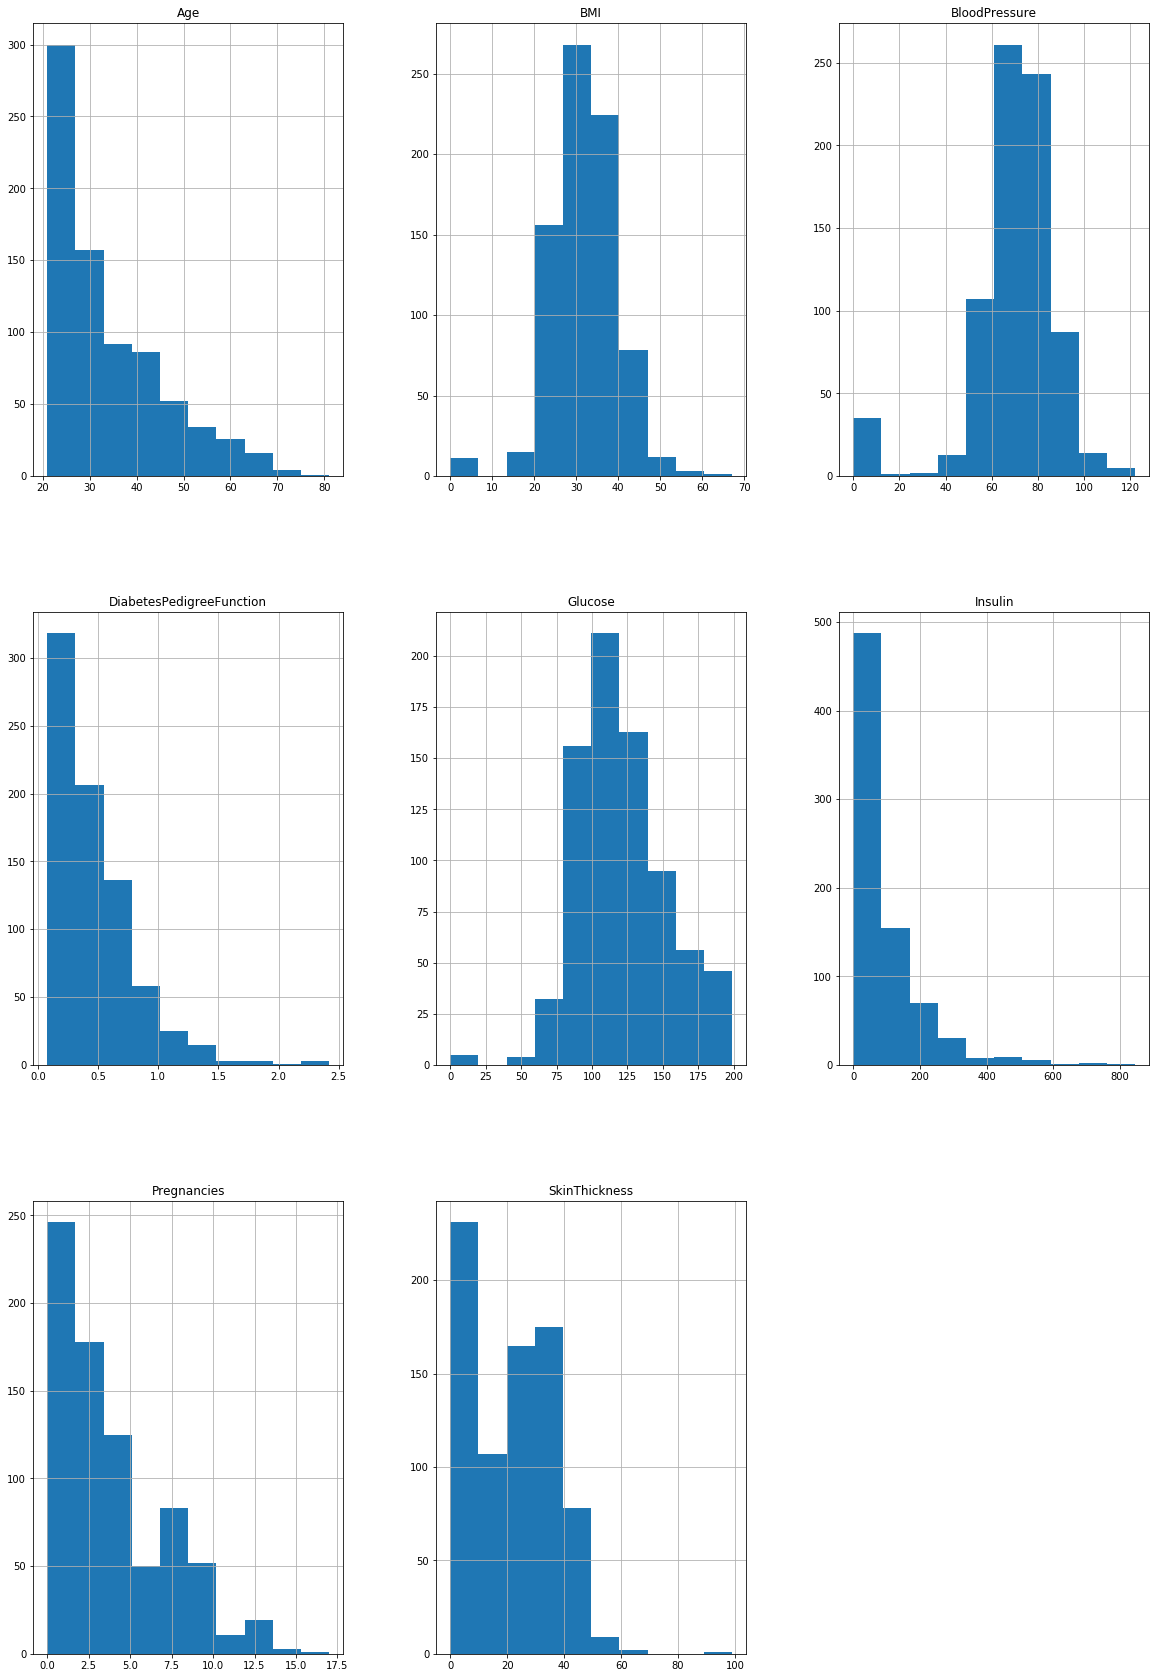

In [9]:
#Univariate Analysis
# Lets look at the distribution of all the predictors except our target variable Outcome

df_pred = df.loc[:,df.columns!='Outcome']
df_pred.hist(figsize=(20,30),)

# Observations

1. Age : Distribution is right skewed. Most of the data points are on the left side of the chart as most of the participants are between the age 21-41.
2. Pregnancies : Mostly number of pregnancies are between 0-5.
3. BMI, BloodPressure, Glucose looks to be normally distributed and have missing values (Zero)
4. Skinthickness and Insulin have zeros values (missing values)


In [10]:
# Outcome column is our target variable which indicates if person is healthy or diabetic
# Lets look at the count of Healthy and Diabetic in our dataset

df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

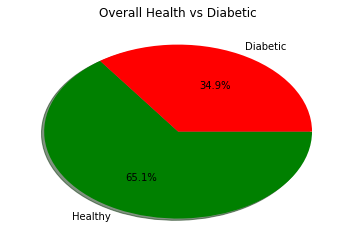

In [13]:
#overall 500 healthy and 268 are diabetic
# Lets plot the pie chart to find out the percent of Healthy and Diabetic in our dataset
colors = ['g', 'r']
labels = ['Healthy', 'Diabetic']
Total = df['Outcome'].groupby(by=df['Outcome']).value_counts()
plt.pie(Total, colors=colors, labels=labels, explode=None, autopct='%1.1f%%',counterclock=False, shadow=True)
plt.title('Overall Health vs Diabetic')
plt.show()

In our dataset overall 65.1% females are healthy and 34.9% are diabetic

# Missing Value or Zero values

In our dataset we dont have direct missing value or NaN but few predictors ('Glucose','BloodPressure','SkinThickness','Insulin','BMI') have zero value. These values shouldnt be zero in real world and hence we are treating them as missing values.

First, we will find out the total count and percentage of missing values and then we are going to replace zero with NaN so that we can use functions available in Pandas to handle them.

In [18]:
import numpy as np
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

missing_values = pd.DataFrame(df.isnull().sum(), columns = ['MissingValueCount'])
missing_values['MissingValuePercent'] = ((df.isnull().sum())/len(df['Outcome'])*100).round(2)

In [19]:
missing_values

,MissingValueCount,MissingValuePercent
Pregnancies,0,0.00
Glucose,5,0.65
BloodPressure,35,4.56
SkinThickness,227,29.56
Insulin,374,48.70
BMI,11,1.43
DiabetesPedigreeFunction,0,0.00
Age,0,0.00
Outcome,0,0.00


As can be seen from above table, SkinThickness and Insulin have majority of the missing values (30% and 49%) and others are less than 5%. If we decide to drop the missing values, it will reduce our dataset size by almost 50%. 

We will replace missing values by central value (median) for column by our target variable (healthy and diabetic median) and will perform further analysis.

In [32]:
#Handling null values by replacing healthy and diabetic median values for each column

col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

for i in col:
    temp = df[df[i].notnull()]
    temp = temp[[i, 'Outcome']].groupby(['Outcome'])[[i]].median().reset_index()
    out_zero = temp[temp['Outcome']==0][i].values
    out_one = temp[temp['Outcome']==1][i].values
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = out_zero
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = out_one

In [34]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

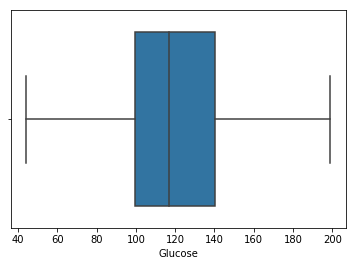

In [68]:
sns.boxplot(x='Glucose',data=df)

0.01     24.34
1.00    846.00
Name: Insulin, dtype: float64

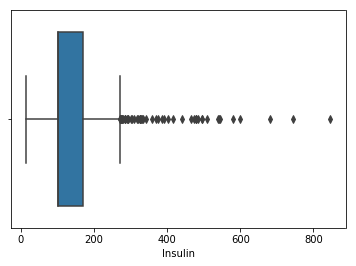

In [78]:
sns.boxplot(x='Insulin',data=df)

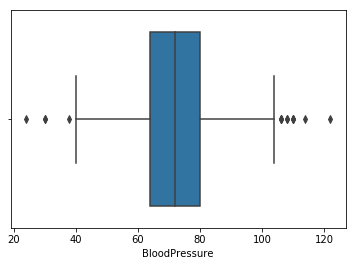

In [61]:
sns.boxplot(x='BloodPressure',data=df)

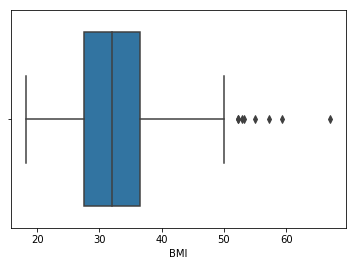

In [63]:
sns.boxplot(x='BMI',data=df)

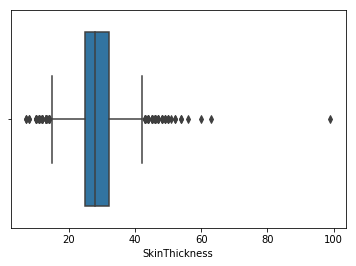

In [65]:
sns.boxplot(x='SkinThickness',data=df)

# Observations

1. Insulin, BloodPressure, SkinThickness and BMI have the outliers but these values are possible in real world.
2. If we use floor and capping method to replace outlier with 1st or 99th percentile values, this will change our dataset values and will affect our analysis.
3. So will not update the outlier and will continue to work on our analysis.


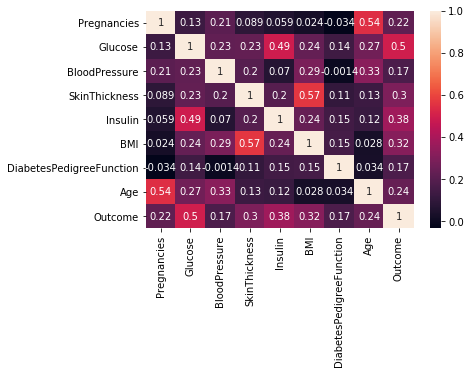

In [80]:
#Bi-variate analysis

#Check the co-relation between different predictors
corr = df.corr()
sns.heatmap(corr,annot=True,)

# Observations

1. So as we can see above there are correlation between few columns. 
2. Age is highly correlated with Pregnancies. 
3. BMI is highly correlated with skinthickness. 
4. Then we also correlation between
    a. Age has correlation with Glucose and BloodPressure
    b. BMI has correlation with Glucose, BloodPressure and pregnancies
    c. Insulin has correlation with Glucose, Pregnancies and BMI
    d. BloodPressure has correlation with Glucose, BMI,Pregnancies and Age

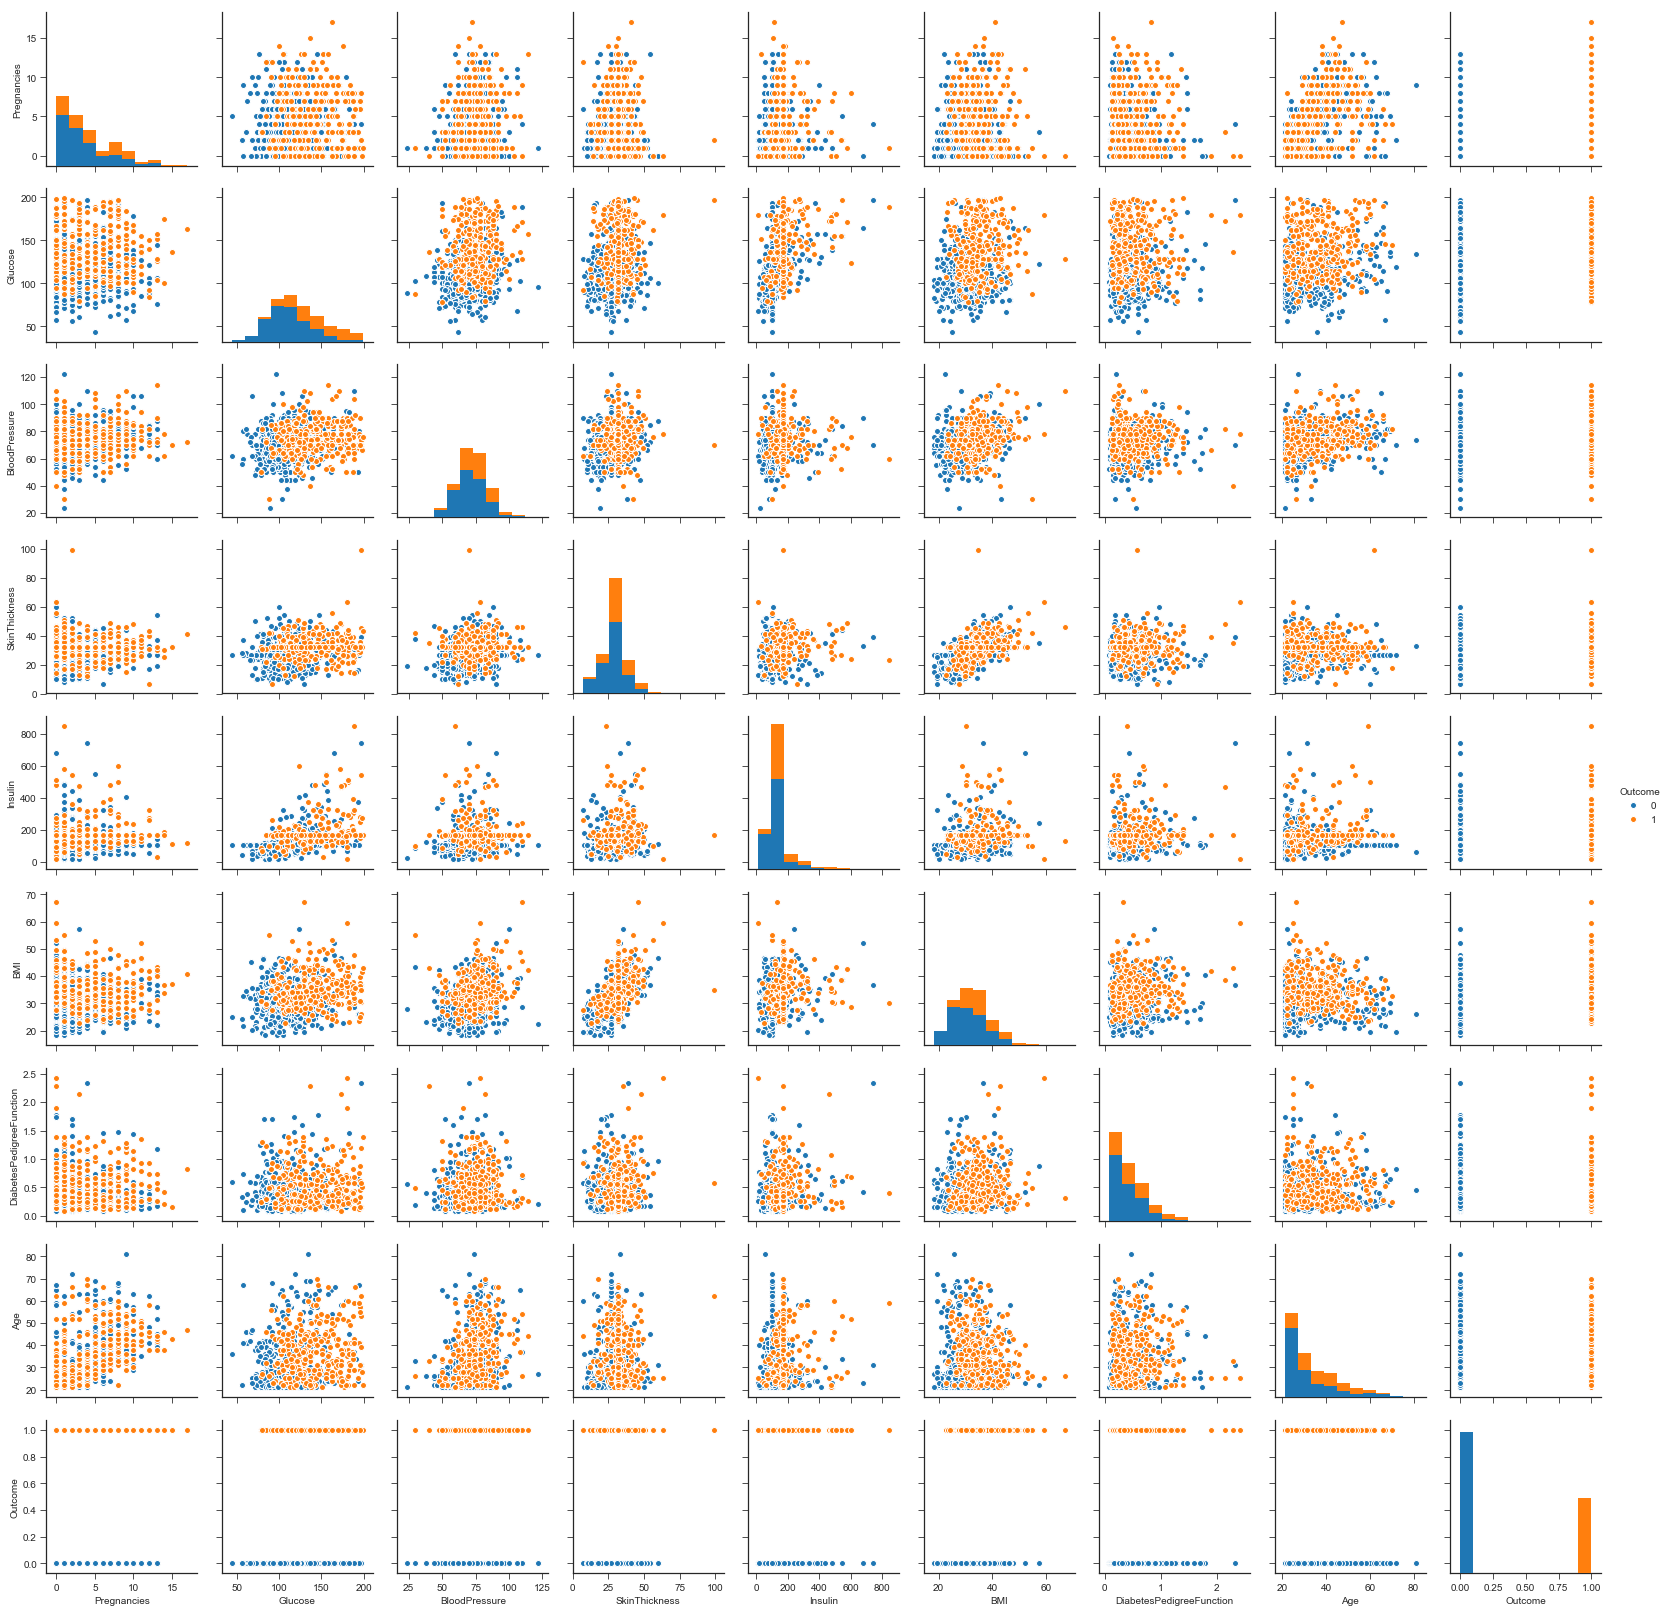

In [96]:
sns.set_style(style='ticks')
plt.figure(figsize=(30,30))
sns.pairplot(df,hue='Outcome')

# Summary

1. Pregnancies vs Age : As we can see from above chart, healthy persons are concentrate more in Age <=    30 and Pregnancies <=6. So older women with high number of pregnancies have more risk of diabetes.
2. BMI vs SkinThickness : Healthy persons are concentrated with a BMI < 30 and skin thickness <= 25
   So person with high BMI and high SkinThickness increases the risk of diabetes.
3. BMI vs Glucose : Healthy persons are concentrate with BMI < 30 and Glucose <= 110
   Overweight or obese person have high risk of daibetes
4. There is no obvious relationship between pedi function and diabetes. This may suggest that diabetes is not hereditary.
5. Risk of diabetes increase with high BMI and high BloodPressure.

